In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

In [2]:
def medianFilter(im:np.ndarray, filter_shape:tuple):
    '''
    Median filter function.
    '''
    ## Initialize the output
    output_im = np.copy(im)

    ## Pad the input image
    pad_tup = [(filter_shape[0]//2, filter_shape[0]//2),
               (filter_shape[1]//2, filter_shape[1]//2)]
    padded_im = np.pad(im, pad_tup, mode="wrap")

    ## Loop through coordinates of the padded image
    for row in range(output_im.shape[0]):
        for col in range(output_im.shape[1]):
            
            # Define the patch we care about
            patch = padded_im[row : row+filter_shape[0], 
                              col : col+filter_shape[1],
                              ...]
            
            # Compute the new pixel value
            output_im[row,col,...] = np.median(patch, axis=(0,1))

    return output_im

def geomMeanFilter(im:np.ndarray, filter_shape:tuple):
    '''
    Geometric mean filter function.
    '''
    ## Define the convolution filter kernel
    kernel = np.ones(filter_shape) / np.prod(filter_shape)

    ## Take the logarithm of the image values
    #  Add a very small value to avoid taking the log of zeros
    log_im = np.log(im + 1e-8)
    
    ## Take the arithmetic mean of the logarithm values
    log_filtered_im = convolve2d(log_im, kernel, mode="full", boundary="wrap")

    ## Take the exponent of the arithmetic meaned log-values
    geom_mean_im = np.exp(log_filtered_im)
    return geom_mean_im


def harmonicMeanFilter(im:np.ndarray, filter_shape:tuple):
    '''
    Harmonic mean filter function.
    '''
    ## Define the convolution filter kernel
    kernel = np.ones(filter_shape) / np.prod(filter_shape)

    ## Compute the reciprocal of the pixel values
    #  Add a very small value to avoid dividing by zero
    recip_im = 1/(im + 1e-8)

    ## Take the arithmetic mean of the reciprocal values
    recip_filtered_im = convolve2d(recip_im, kernel, mode="full", boundary="wrap")

    ## Take the reciprocal of the arithmetic meaned reciprocal values
    harmonic_filtered_im = 1/recip_filtered_im
    return harmonic_filtered_im



def alphaTrimmedMeanFilter(im:np.ndarray, filter_shape:tuple, d:int):
    '''
    Alpha-trimmed mean filter function.
    '''
    ## Pad the input image
    pad_tup = [(filter_shape[0]//2, filter_shape[0]//2),
               (filter_shape[1]//2, filter_shape[1]//2)]
    padded_im = np.pad(im, pad_tup, mode="wrap")

    ## Initialize a filtered image
    im_out = np.zeros_like(im)

    ## Loop through the image's pixels
    for row in range(im.shape[0]):
        for col in range(im.shape[1]):

            # Define the image patch
            patch = padded_im[row:row+filter_shape[0], col:col+filter_shape[1]]
            
            # Extract the values of the patch and sort them by value
            patchvals = list(patch.ravel())
            patchvals.sort()

            # Compute the mean of the alpha-trimmed values
            trimmed_patchvals = patchvals[d//2:-d//2]
            im_out[row,col] = np.mean(trimmed_patchvals)
    
    return im_out

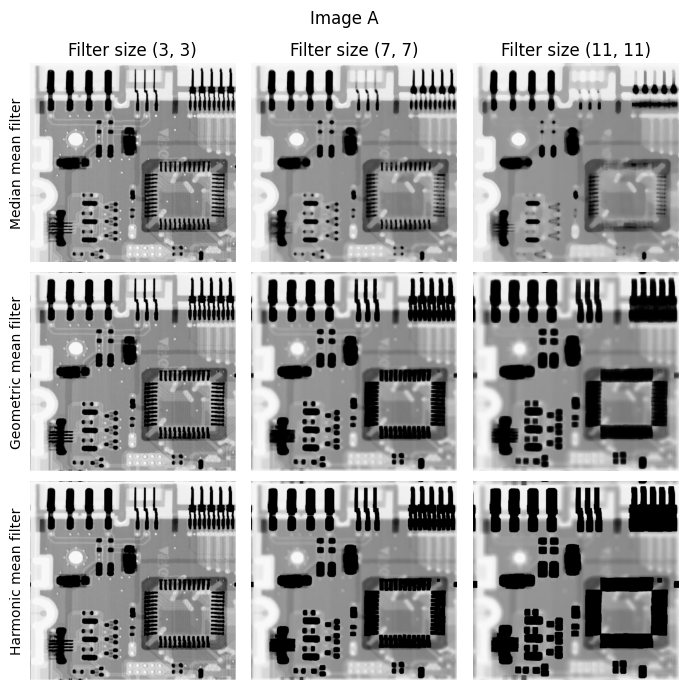

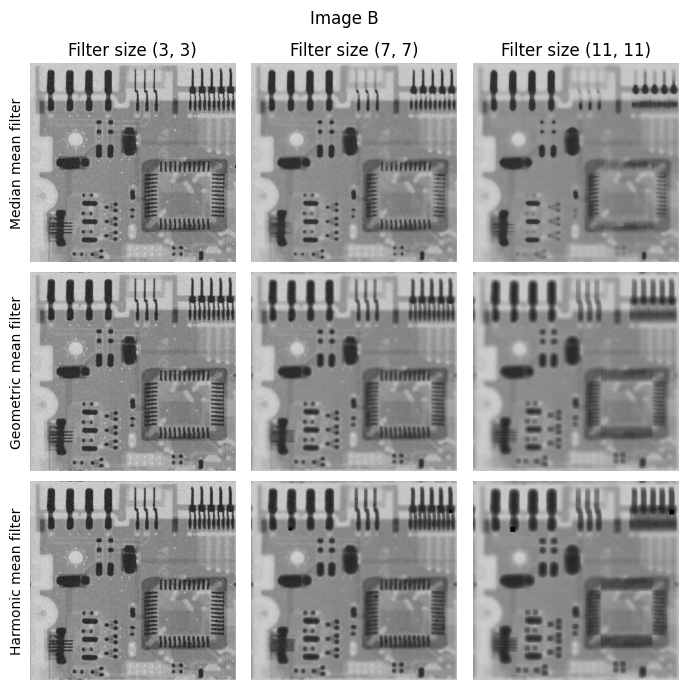

In [3]:
'''
Part (1)
'''
## Load the images
im1a = np.array( Image.open("Data/Fig0507(a)(ckt-board-orig).tif") )
im1b = np.array( Image.open("Data/Fig0507(b)(ckt-board-gauss-var-400).tif") )

## Define the kernel sizes to use
# filter_shapes = [(3,5),(5,3)]
filter_shapes = [(3,3), (7,7), (11,11)]
fig1a,ax1a = plt.subplots(3, len(filter_shapes), figsize=(7,7))
fig1b,ax1b = plt.subplots(3, len(filter_shapes), figsize=(7,7))

## Loop through all the specified filter sizes
for ix,tup in enumerate(filter_shapes):
    ## Compute the median, geometric, and harmonic means of each image
    median_a = medianFilter(im1a, tup)
    median_b = medianFilter(im1b, tup)
    
    geom_mean_a = geomMeanFilter(im1a, tup)
    geom_mean_b = geomMeanFilter(im1b, tup)

    harmonic_a = harmonicMeanFilter(im1a, tup)
    harmonic_b = harmonicMeanFilter(im1b, tup)


    ## Plot the filtered images
    ax1a[0,ix].imshow(median_a, cmap="gray", vmin=0, vmax=255)
    ax1a[1,ix].imshow(geom_mean_a, cmap="gray", vmin=0, vmax=255)
    ax1a[2,ix].imshow(harmonic_a, cmap="gray", vmin=0, vmax=255)

    ax1b[0,ix].imshow(median_b, cmap="gray", vmin=0, vmax=255)
    ax1b[1,ix].imshow(geom_mean_b, cmap="gray", vmin=0, vmax=255)
    ax1b[2,ix].imshow(harmonic_b, cmap="gray", vmin=0, vmax=255)

    ## Add titles where necessary
    ax1a[0,ix].set_title(f"Filter size {tup}")
    ax1b[0,ix].set_title(f"Filter size {tup}")


## Format the images by making the axes invisible
for a in ax1a.ravel(): 
    a.spines.left.set_visible(False)
    a.spines.right.set_visible(False)
    a.spines.top.set_visible(False)
    a.spines.bottom.set_visible(False)
    a.set_xticks([])
    a.set_yticks([])
ax1a[0,0].set_ylabel("Median mean filter")
ax1a[1,0].set_ylabel("Geometric mean filter")
ax1a[2,0].set_ylabel("Harmonic mean filter")
fig1a.suptitle("Image A")
fig1a.tight_layout()

for a in ax1b.ravel(): 
    a.spines.left.set_visible(False)
    a.spines.right.set_visible(False)
    a.spines.top.set_visible(False)
    a.spines.bottom.set_visible(False)
    a.set_xticks([])
    a.set_yticks([])
ax1b[0,0].set_ylabel("Median mean filter")
ax1b[1,0].set_ylabel("Geometric mean filter")
ax1b[2,0].set_ylabel("Harmonic mean filter")
fig1b.suptitle("Image B")
fig1b.tight_layout()


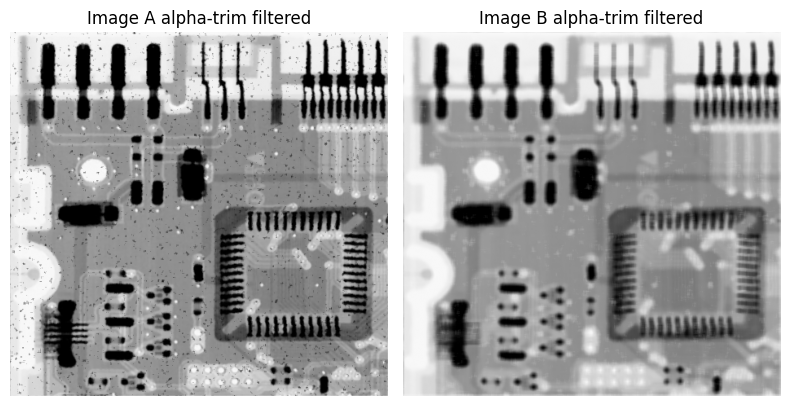

In [4]:
'''
Part (2)
'''
## Load the images
im2a = np.array( Image.open("Data/Fig0508(a)(circuit-board-pepper-prob-pt1).tif") )
im2b = np.array( Image.open("Data/Fig0508(b)(circuit-board-salt-prob-pt1).tif") )

## Compute the alpha-trimmed mean filtered images
alphafilt_a = alphaTrimmedMeanFilter(im2a, (3,3), 4)
alphafilt_b = alphaTrimmedMeanFilter(im2b, (7,7), 14)

## Plot the images
fig2, ax2 = plt.subplots(1,2, figsize=(8,5))
ax2[0].imshow(alphafilt_a, cmap="gray", vmin=0, vmax=255)
ax2[1].imshow(alphafilt_b, cmap="gray", vmin=0, vmax=255)

## Format the plots
ax2[0].set_title("Image A alpha-trim filtered")
ax2[1].set_title("Image B alpha-trim filtered")
for a in ax2: a.set_axis_off()
plt.tight_layout()


plt.show()